Analyzing the dataset

The NSL-KDD dataset includes different CSVs for the test data and the training data - KDDTrain and KDDTest

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("KDDTrain.csv") 
df.shape #tells us the number of rows and columns of the dataset

(125973, 42)

In [4]:
#viewing the first 10 entries of the dataset 
df.sample(10)

,duration,protocol_type,service,flag,src_bytesdst,bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
18732,0,icmp,eco_i,SF,8,0,0,0,0,0,...,62,1.00,0.00,1.00,0.52,0.00,0.00,0.00,0.0,anomaly
77100,0,icmp,eco_i,SF,8,0,0,0,0,0,...,249,1.00,0.00,1.00,0.25,0.00,0.00,0.00,0.0,anomaly
62450,0,tcp,efs,S0,0,0,0,0,0,0,...,10,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.0,anomaly
6867,0,udp,private,SF,105,147,0,0,0,0,...,204,0.80,0.01,0.00,0.00,0.00,0.00,0.00,0.0,normal
60064,0,tcp,ftp_data,S1,12324,0,0,0,0,0,...,66,0.19,0.05,0.19,0.03,0.02,0.02,0.00,0.0,normal
62343,0,udp,private,SF,105,146,0,0,0,0,...,164,0.93,0.02,0.01,0.00,0.00,0.00,0.00,0.0,normal
58892,0,icmp,eco_i,SF,8,0,0,0,0,0,...,25,1.00,0.00,1.00,0.52,0.00,0.00,0.00,0.0,anomaly
109811,0,tcp,iso_tsap,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.0,anomaly
3460,0,tcp,ftp_data,SF,1339,0,0,0,0,0,...,71,0.28,0.02,0.28,0.00,0.00,0.00,0.00,0.0,normal
61229,11926,tcp,telnet,SF,95,1453,0,0,0,0,...,4,0.04,0.86,0.01,0.50,0.00,0.00,0.82,0.5,normal


In [5]:
#shows the row counts and the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytesdst                 125973 non-null  int64  
 5   bytes                        125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
#shows the main statistics for every column in the dataset
df.describe()

,duration,src_bytesdst,bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#viewing the column names
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytesdst', 'bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_rerror_rate', 'rerror_rate',
       'srv_rerror_rate.1', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

Data Pre-processing

Step 1: Removing usesless characters 

In [8]:
#Adding class num
df['class_num'] = df['class'].map({'normal':0, 'anomaly':1})
#Finding any columns of datatype string
string_cols = df.select_dtypes(include='object').columns
print(df[string_cols])

       protocol_type   service flag    class
0                tcp  ftp_data   SF   normal
1                udp     other   SF   normal
2                tcp   private   S0  anomaly
3                tcp      http   SF   normal
4                tcp      http   SF   normal
...              ...       ...  ...      ...
125968           tcp   private   S0  anomaly
125969           udp   private   SF   normal
125970           tcp      smtp   SF   normal
125971           tcp    klogin   S0  anomaly
125972           tcp  ftp_data   SF   normal

[125973 rows x 4 columns]


As we can see from the above sample, for the columns with string datatype, the values do not have any useless characters and hence, these columns do not need to be changed.

Step 2: Removing columns with a high percentage of zero values

In [9]:
# Calculate percentage of 0 values for each column
zero_percents = (df == 0).sum(axis=0) / len(df) 
print(zero_percents)

duration                       0.920475
protocol_type                  0.000000
service                        0.000000
flag                           0.000000
src_bytesdst                   0.392084
bytes                          0.539536
land                           0.999802
wrong_fragment                 0.991347
urgent                         0.999929
hot                            0.978797
num_failed_logins              0.999032
logged_in                      0.604264
num_compromised                0.989791
root_shell                     0.998658
su_attempted                   0.999365
num_root                       0.994848
num_file_creations             0.997722
num_shells                     0.999627
num_access_files               0.997055
num_outbound_cmds              1.000000
is_host_login                  0.999992
is_guest_login                 0.990577
count                          0.000103
srv_count                      0.000103
serror_rate                    0.689267


In [10]:
#finding the columns with the highest percentage of zero values
highZeroPercents=zero_percents[zero_percents>0.9]
print(highZeroPercents)

duration              0.920475
land                  0.999802
wrong_fragment        0.991347
urgent                0.999929
hot                   0.978797
num_failed_logins     0.999032
num_compromised       0.989791
root_shell            0.998658
su_attempted          0.999365
num_root              0.994848
num_file_creations    0.997722
num_shells            0.999627
num_access_files      0.997055
num_outbound_cmds     1.000000
is_host_login         0.999992
is_guest_login        0.990577
dtype: float64


In [11]:
#as we can see from the above output there are 7 columns which we can remove from the dataset
zero_threshold=0.9
#boolean mask to filter out the columns 
mask_cols=zero_percents<zero_threshold
df_filtered=df.loc[:,mask_cols]
print(df_filtered)

       protocol_type   service flag  src_bytesdst  bytes  logged_in  count  \
0                tcp  ftp_data   SF           491      0          0      2   
1                udp     other   SF           146      0          0     13   
2                tcp   private   S0             0      0          0    123   
3                tcp      http   SF           232   8153          1      5   
4                tcp      http   SF           199    420          1     30   
...              ...       ...  ...           ...    ...        ...    ...   
125968           tcp   private   S0             0      0          0    184   
125969           udp   private   SF           105    145          0      2   
125970           tcp      smtp   SF          2231    384          1      1   
125971           tcp    klogin   S0             0      0          0    144   
125972           tcp  ftp_data   SF           151      0          1      1   

        srv_count  serror_rate  srv_rerror_rate  ...  dst_host_

Step 3: Finding NA values

In [12]:
NA_perc=df_filtered.isna().mean()*100
print(NA_perc[NA_perc>0.5])

Series([], dtype: float64)


There are no NA values

Step 4: Removing duplicates

In [25]:
df_filtered.drop_duplicates(inplace=True)
df_filtered.to_csv('cleaned_dataset.csv', index=False)
print(df_filtered.columns)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27644\2658440393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)


Index(['protocol_type', 'service', 'flag', 'src_bytesdst', 'bytes',
       'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_rerror_rate',
       'rerror_rate', 'srv_rerror_rate.1', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class_num'],
      dtype='object')


Step-5 Encoding categorical Variables

In [23]:
#Finding Categorical Variables
print(df_filtered.shape)

(124652, 26)


In [15]:
del df_filtered['class']
for col in df_filtered.columns:
    print(col)

protocol_type
service
flag
src_bytesdst
bytes
logged_in
count
srv_count
serror_rate
srv_rerror_rate
rerror_rate
srv_rerror_rate.1
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
class_num


In [16]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytesdst                     int64
bytes                            int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_rerror_rate          

In [17]:
# Performing one-hot encoding on the 'protocol_type' feature
df_encoded = pd.get_dummies(df_filtered, columns=['protocol_type','service','flag'])

In [27]:
df_encoded.head()

,src_bytesdst,bytes,logged_in,count,srv_count,serror_rate,srv_rerror_rate,rerror_rate,srv_rerror_rate.1,same_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,491,0,0,2,2,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
1,146,0,0,13,1,0.0,0.0,0.0,0.0,0.08,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,...,0,0,0,0,1,0,0,0,0,0
3,232,8153,1,5,5,0.2,0.2,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
4,199,420,1,30,32,0.0,0.0,0.0,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0


Exploratory Data Analysis

Our target variable for the given dataset is the last column - class which has classifies the rows into normal or anomaly. Changing the column to a numeric column with 0 for normal and 1 for anomaly

<Axes: >

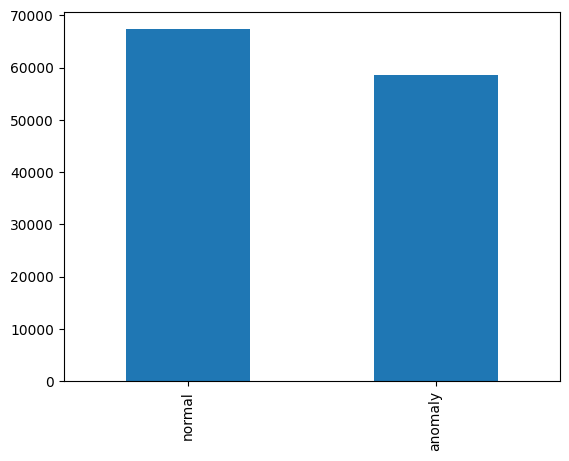

In [32]:
#viewing the count of normal and anomaly classes
df['class'].value_counts().plot(kind='bar')

<Axes: xlabel='protocol_type', ylabel='count'>

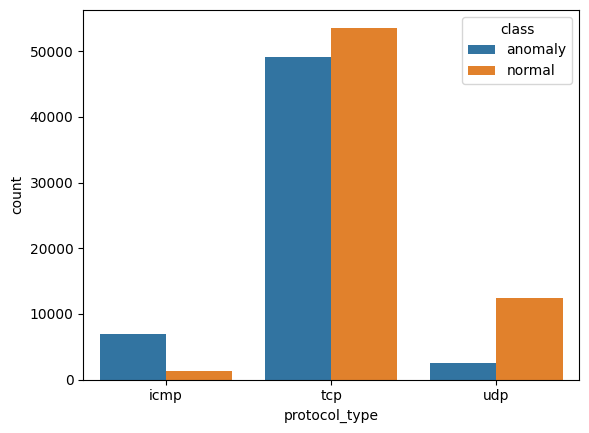

In [33]:
grouped_data = df.groupby(['protocol_type', 'class']).size().reset_index(name='count')
# create the bar plot using seaborn
sns.barplot(x='protocol_type', y='count', hue='class', data=grouped_data)

<Axes: xlabel='flag', ylabel='count'>

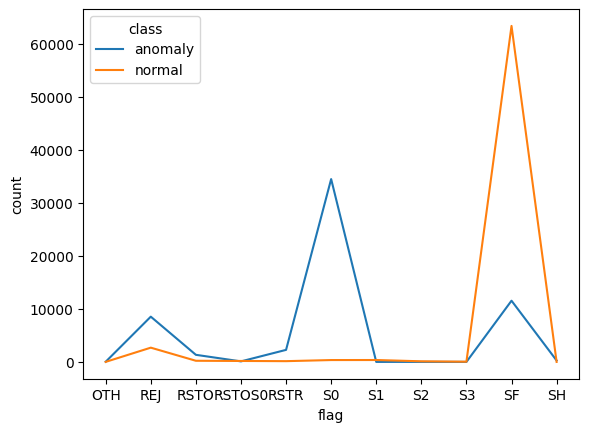

In [34]:
#flag
grouped_data = df.groupby(['flag', 'class']).size().reset_index(name='count')
sns.lineplot(x='flag', y='count', hue='class', data=grouped_data)

<Axes: xlabel='count', ylabel='service'>

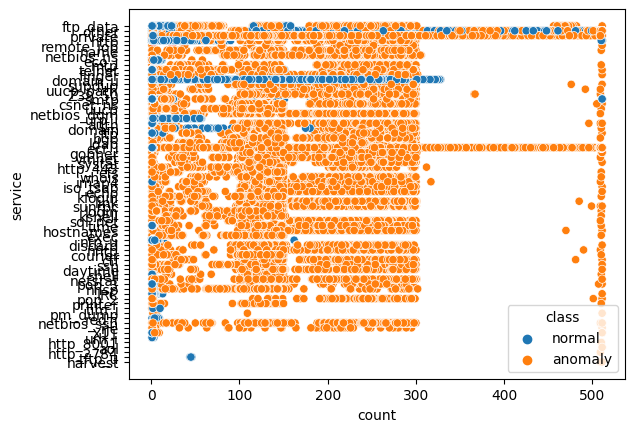

In [21]:
#service vs class
#grouped_data = df.groupby(['service', 'class']).size().reset_index(name='count')
# create the bar plot using seaborn
sns.scatterplot(x='count',y='service', hue='class', data=df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38504\2371213151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_filtered.corr()


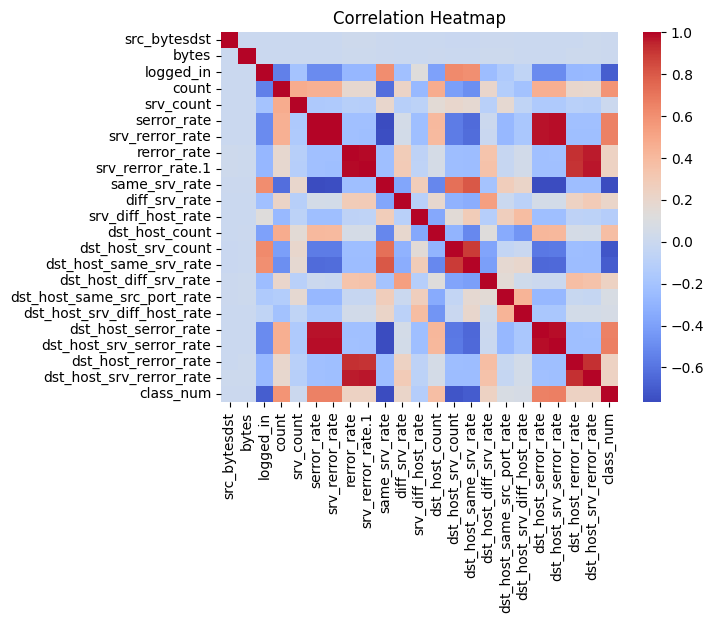

In [35]:
# Compute the correlation matrix
corr = df_filtered.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

BUILDING THE MODEL

Random Forest Classifier

In [36]:
#Loading required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [72]:
#X = df_encoded.iloc[:, :-1]  # Select all columns except the last one
#y = df_encoded.iloc[:, -1]   # Select the last column
X = df_encoded.iloc[:, [i for i in range(df_encoded.shape[1]) if i != 22]]
y = df_encoded.iloc[:,22] 
print(y)

0         0
1         0
2         1
3         0
4         0
         ..
125967    0
125968    1
125970    0
125971    1
125972    0
Name: class_num, Length: 124652, dtype: int64


In [73]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Creating a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)

In [75]:
# Training the Random Forest classifier on the training set
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [76]:
# Evaluate the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9945449440455658


Tuning the parameters to improve the accuracy further

In [77]:
# Defining a list of hyperparameters to try
n_estimators_list = [10, 50, 100]
max_depth_list = [None, 10, 20]
min_samples_split_list = [2, 5, 10]

In [78]:
best_accuracy = 0
best_params = {}

In [79]:
from sklearn.metrics import accuracy_score

# Looping over all combinations of hyperparameters
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            # Training a Random Forest model with the current hyperparameters
            rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
            rfc.fit(X_train, y_train)

            # Making predictions on the test set
            y_pred = rfc.predict(X_test)

            # Evaluating the accuracy of the model
            accuracy = accuracy_score(y_test, y_pred)

            # Checking if the current model is the best one so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}


In [80]:
# Printing the best hyperparameters and accuracy
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy: {best_accuracy}")

Best hyperparameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 5}
Accuracy: 0.9986362360113914


In [81]:
old_acc=0.9999197785889054
new_acc=0.9999598892944527
print("Percentage increase:", ((new_acc-old_acc)/old_acc)*100)

Percentage increase: 0.0040113923542876035


Comparing Performance with other algorithms

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [83]:
# Defining the classifiers to compare
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=10, random_state=42)
dtc = DecisionTreeClassifier(max_depth=10, random_state=42)
bagging = BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state=42)
boosting = AdaBoostClassifier(base_estimator=dtc, n_estimators=100, random_state=42)

In [84]:
# Training and evaluating each classifier
classifiers = [rfc, dtc, bagging, boosting]
accuracy_scores = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


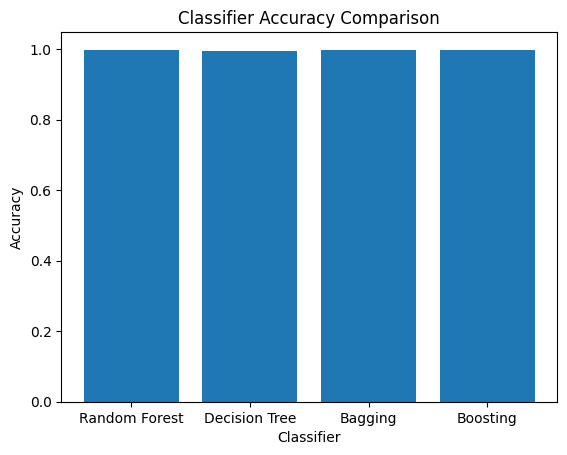

In [85]:
# Plotting the accuracy scores for each classifier
class_names = ['Random Forest', 'Decision Tree', 'Bagging', 'Boosting']
plt.bar(class_names, accuracy_scores)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

In [86]:
best_accuracy = max(accuracy_scores)
best_classifier = class_names[accuracy_scores.index(best_accuracy)]
print("Best classifier: {best_classifier} with accuracy {best_accuracy}")

Best classifier: Boosting with accuracy 0.9986362360113914


Prediciting new values with new dataset

In [133]:
new_data=pd.read_csv('KDDTest+.csv')
#new_data.shape
#new_data.columns
#new_data['class_num'] = new_data['class'].map({'normal':0, 'anomaly':1})
newdata=new_data.loc[:,mask_cols]
del newdata['class']
newdata.drop_duplicates(inplace=True)
newdatae=pd.get_dummies(newdata,columns=['protocol_type','service','flag'])
newdatae.sample(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38504\3765402727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata.drop_duplicates(inplace=True)


,src_bytesdst,bytes,logged_in,count,srv_count,serror_rate,srv_rerror_rate,rerror_rate,srv_rerror_rate.1,same_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
7242,0,0,0,246,13,0.00,0.0,1.00,1.0,0.05,...,0,1,0,0,0,0,0,0,0,0
18000,0,0,0,140,13,1.00,1.0,0.00,0.0,0.09,...,0,0,0,0,1,0,0,0,0,0
13081,0,0,0,192,14,1.00,1.0,0.00,0.0,0.07,...,0,0,0,0,1,0,0,0,0,0
20856,0,0,0,121,6,1.00,1.0,0.00,0.0,0.05,...,0,0,0,0,1,0,0,0,0,0
20336,0,0,0,458,1,0.14,0.0,0.86,1.0,0.00,...,1,0,0,0,0,0,0,0,0,0
9860,1,0,0,41,1,0.00,0.0,0.00,0.0,0.02,...,0,0,0,0,0,0,0,0,1,0
7952,285,3204,1,8,8,0.00,0.0,0.00,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
11032,1480,0,0,1,3,0.00,0.0,0.00,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0
5363,0,0,0,137,11,0.00,0.0,1.00,1.0,0.08,...,1,0,0,0,0,0,0,0,0,0
9472,79,45,0,281,281,0.00,0.0,0.00,0.0,1.00,...,0,0,0,0,0,0,0,0,1,0


In [137]:
cols1 = set(newdatae.columns)
cols2 = set(X_test.columns)

# find the missing columns
missing_cols = cols2 - cols1

# print the missing columns
for col in missing_cols:
    print(col)

In [136]:
#we must add the missing columns to the dataset
#for col in missing_cols:
#    newdatae[col]=np.zeros(len(newdatae))
missing_cols = X_test.columns.difference(newdatae.columns)
missing_cols_idx = [X_test.columns.get_loc(col) for col in missing_cols]
n=len(missing_cols)
for i in range(n):
    newdatae.insert(missing_cols_idx[i], missing_cols[i], np.zeros(len(newdatae)))

In [138]:
print(newdatae.iloc[0])

src_bytesdst      0.0
bytes             0.0
logged_in         0.0
count           229.0
srv_count        10.0
                ...  
flag_S1           0.0
flag_S2           0.0
flag_S3           0.0
flag_SF           0.0
flag_SH           0.0
Name: 0, Length: 106, dtype: float64


In [161]:
new_predictions=rfc.predict(newdatae)
new_predictions
print(new_predictions)
#for i in new_predictions:
if(new_predictions[6]==0):
    print("Normal")
else:
    print("Anomaly")

[1 1 0 ... 1 0 1]
Normal
